In [2]:
%matplotlib inline

import os

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

plt.style.use('ggplot')

In [3]:
def read_data(dir_path, file_prefix, r):
    file_path = os.path.join(dir_path, '{}_{}.csv'.format(file_prefix, r))
    with open(file_path, 'r') as f:
        data = np.fromstring(f.read().strip(), sep=',').astype('int32')
    
    return data

In [4]:
BUY = 1
STAY = 0
SELL = -1

WIN = 1
EVEN = 0
LOSE = -1

## Standard deviation of market attendances

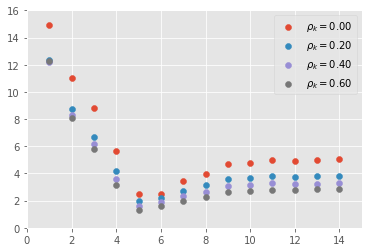

In [20]:
# Parameters
s = 2
eps = 0
n_minority_agents = 101
n_producer_agents = 0
n_speculator_agents = 0
n_iters = 50000
n_runs = 1

for rhok in [0, 0.2, 0.4, 0.6]:
    if rhok == 0:
        rhos = 0
    else:
        rhos = 0.09
    xs, ys = [], []
    for p in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4095, 8192, 16384]:
        # Read data
        dir_path = '../simulation_results/s{}_p{}_eps{:.2f}_rhok{:.2f}_rhos{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/'.format(
            s, p, eps, rhok, rhos, n_minority_agents, n_producer_agents, n_speculator_agents, n_iters, n_runs)
#         excess_demand_history = read_data(dir_path, 'excess_demand_history', 0)
        history = read_data(dir_path, 'buys_history', 0)

        xs.append(np.log2(p))
        ys.append(np.std(history))

    xs = np.array(xs)
    ys = np.array(ys)

    plt.scatter(xs, ys, label=r'$\rho_k = {:.2f}$'.format(rhok))

plt.xlim(0, 15)
plt.ylim(0, 16)

plt.legend()

plt.show()

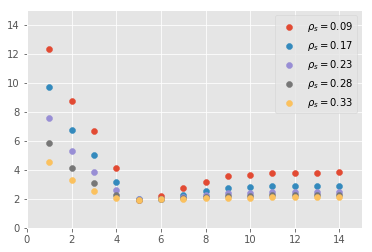

In [21]:
# Parameters
s = 2
eps = 0
n_minority_agents = 101
n_producer_agents = 0
n_speculator_agents = 0
n_iters = 50000
n_runs = 1

rhok = 0.2

for rhos in [0.09, 0.17, 0.23, 0.28, 0.33]:
    xs, ys = [], []
    for p in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]:
        # Read data
        dir_path = '../simulation_results/s{}_p{}_eps{:.2f}_rhok{:.2f}_rhos{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/'.format(
            s, p, eps, rhok, rhos, n_minority_agents, n_producer_agents, n_speculator_agents, n_iters, n_runs)
#         history = read_data(dir_path, 'excess_demand_history', 0)
        history = read_data(dir_path, 'buys_history', 0)

        xs.append(np.log2(p))
        ys.append(np.std(history))

    xs = np.array(xs)
    ys = np.array(ys)

    plt.scatter(xs, ys, label=r'$\rho_s = {:.2f}$'.format(rhos))

plt.xlim(0, 15)
plt.ylim(0, 15)

plt.legend()

plt.show()

## Success rate

In [4]:
# Parameters
s = 2
eps = 0
rhok = 0.2
n_minority_agents = 101
n_producer_agents = 0
n_speculator_agents = 0
n_iters = 50000
n_runs = 1

In [5]:
def read_2ddata(dir_path, file_prefix, r, dtype='int32'):
    file_path = os.path.join(dir_path, '{}_{}.csv'.format(file_prefix, r))
    
    data = []
    for line in open(file_path):
        d = np.fromstring(line.strip(), sep=',', dtype=dtype)
        data.append(d)
    
    return np.stack(data, 0)

In [6]:
def compute_success_rate(winning_histories):
    wins = (winning_histories == WIN).sum(1)
    loses = (winning_histories == LOSE).sum(1)
    
    return np.mean(wins / (wins + loses))

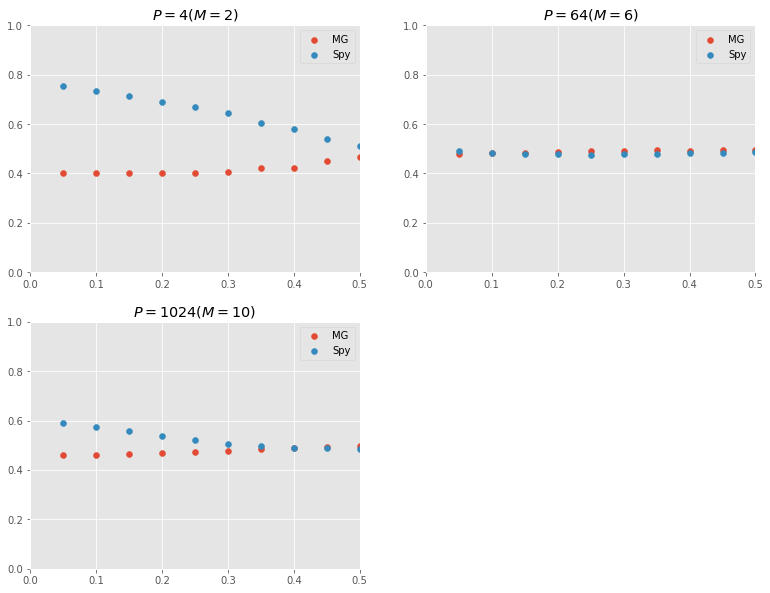

In [14]:
ps = [4, 64, 1024]
rhoss = np.linspace(0.05, 0.5, 10)

x_min, x_max = 0.0, 0.5
y_min, y_max = 0.0, 1.0

fig = plt.figure(figsize=(13, 10))

for i, p in enumerate(ps):
    xs_mg, xs_spy, ys_mg, ys_spy = [], [], [], []
    for rhos in rhoss:
        dir_path = '../simulation_results/s{}_p{}_eps{:.2f}_rhok{:.2f}_rhos{:.2f}_nmins{}_npros{}_nspes{}_niters{}_nruns{}/'.format(
            s, p, eps, rhok, rhos, n_minority_agents, n_producer_agents, n_speculator_agents, n_iters, n_runs)
        winning_histories_mg = read_2ddata(dir_path, 'winning_histories_minority_game_agents', 0)
        winning_histories_spy = read_2ddata(dir_path, 'winning_histories_spy_agents', 0)
        
        success_rate_mg = compute_success_rate(winning_histories_mg)
        success_rate_spy = compute_success_rate(winning_histories_spy)
        
        xs_mg.append(rhos)
        xs_spy.append(rhos)
        ys_mg.append(success_rate_mg)
        ys_spy.append(success_rate_spy)
    
    ax = fig.add_subplot(2, 2, i + 1)
    ax.scatter(xs_mg, ys_mg, label=r'MG')
    ax.scatter(xs_spy, ys_spy, label=r'Spy')
    
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    
    ax.set_title(r'$P = {}  (M = {})$'.format(p, int(np.log2(p))))
    
    ax.legend()

plt.show()